In [1]:
from pytesseract import pytesseract
import cv2
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt
from PIL import Image

import os
import sys

pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [16]:
def get_files_name(directory:str, filter_extension:list=None)->list:
     
    files = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        
        # checking if it is a file
        if filter_extension != None:
            if os.path.isfile(f):
                if filename.split('.')[-1].upper() in filter_extension:
                    files.append(filename)
        else:
            if os.path.isfile(f):
                files.append(filename)

    return files
def get_pure_list(text:str):
    text_list = (text).split('\n')

    while ' ' in text_list:
        text_list.remove(' ')

    while '' in text_list:
        text_list.remove('')

    while '\x0c' in text_list:
        text_list.remove('\x0c')
        
    return text_list
def get_text(img_path:str,convert_to_gray:bool=True,plot:bool=False):
    
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if plot:
        plt.subplot(1,2,1)
        plt.imshow(img)

        plt.subplot(1,2,2)
        plt.imshow(gray)

        plt.show()
    if convert_to_gray:
        return get_pure_list(pytesseract.image_to_string(gray))
    else:
        return get_pure_list(pytesseract.image_to_string(img))

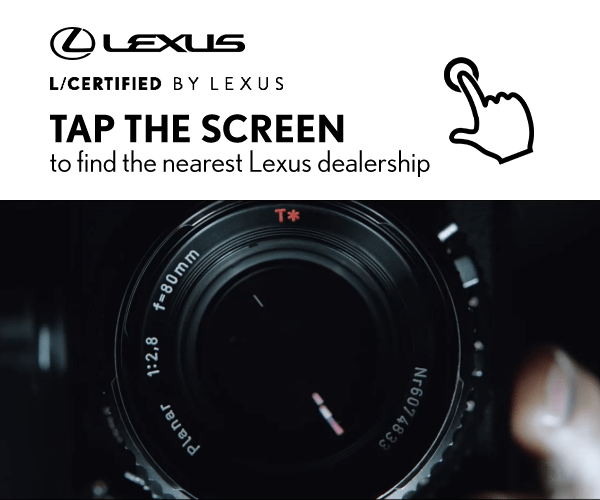

In [23]:
path = "../data/Assets/0a22f881b77f00220f2034c21a18b854/_preview.png"
Image.open(path)

In [24]:
all_text = get_text("../data/Assets/0a22f881b77f00220f2034c21a18b854/_preview.png")

In [25]:
all_text

['Ovexus',
 'L/CERTIFIED BY LEXUS',
 'TAP THE SCREEN',
 'to find the nearest Lexus dealership']

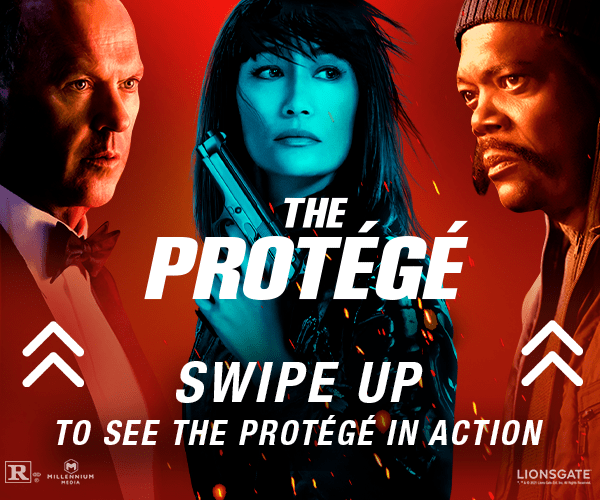

In [27]:
path = "../data/Assets/0a22f881b77f00220f2034c21a18b854/_preview1.png"
Image.open(path)

In [28]:
all_text = get_text("../data/Assets/0a22f881b77f00220f2034c21a18b854/_preview1.png")

In [29]:
all_text

['i i', 'F fa We', 'rN IN', 'a3 Tae vo.', 'MY SEE THE PROTEGE ed Sa']